In [1]:
# read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/7160_1.csv')

In [2]:
df.head()

address                                         categories  \
0            407 Radam Ln                                            brewery   
1  1135 N W Galveston Ave                                    Brewery and Bar   
2        830 W Bannock St  brewery, Restaurant, Pub, Brewery, pub, Brewer...   
3          1022 Texan Trl  Wine Tours & Tastings, Food & Drink, Tours, Br...   
4              Po Box 135  American Restaurants, Bar & Grill Restaurants,...   

        city country                            key        lat        long  \
0     Austin      US        us/tx/austin/407radamln        NaN         NaN   
1       Bend      US  us/or/bend/1135nwgalvestonave        NaN         NaN   
2      Boise      US      us/id/boise/830wbannockst  43.617711 -116.202883   
3  Grapevine      US   us/tx/grapevine/1022texantrl  32.938385  -97.064340   
4    Villard      US         us/mn/villard/pobox135        NaN         NaN   

                                              name  \
0                                 (512) Brewing Co   
1  10 Barrel Brewing Company, 10 Barrel Brewing Co   
2         10 Barrel Brewing, 10 Barrel Brewing Co.   
3                                  10 Gallon Tours   
4                                   10 Mile Tavern   

                                     phones postalCode province  \
0                                5127072337      78745       TX   
1                (541) 585-1007, 5415851007      97703       OR   
2  (208) 344-5870, 2083445870, 2.08344587E9      83702       ID   
3                 18174031832, 817 403-1832      76051       TX   
4                                3205542939      56385       MN   

                        websites  
0                            NaN  
1                   10barrel.com  
2                   10barrel.com  
3  http://www.10gallontours.com/  
4    http://www.10miletavern.com

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375 entries, 0 to 7374
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     7375 non-null   object 
 1   categories  7375 non-null   object 
 2   city        7375 non-null   object 
 3   country     7375 non-null   object 
 4   key         7375 non-null   object 
 5   lat         5414 non-null   float64
 6   long        5416 non-null   float64
 7   name        7375 non-null   object 
 8   phones      6159 non-null   object 
 9   postalCode  7272 non-null   object 
 10  province    7375 non-null   object 
 11  websites    3548 non-null   object 
dtypes: float64(2), object(10)
memory usage: 691.5+ KB


In [4]:
# change name of column name to brewery_name
df.rename(columns={'name':'brewery_name'}, inplace=True)
df.head()

address                                         categories  \
0            407 Radam Ln                                            brewery   
1  1135 N W Galveston Ave                                    Brewery and Bar   
2        830 W Bannock St  brewery, Restaurant, Pub, Brewery, pub, Brewer...   
3          1022 Texan Trl  Wine Tours & Tastings, Food & Drink, Tours, Br...   
4              Po Box 135  American Restaurants, Bar & Grill Restaurants,...   

        city country                            key        lat        long  \
0     Austin      US        us/tx/austin/407radamln        NaN         NaN   
1       Bend      US  us/or/bend/1135nwgalvestonave        NaN         NaN   
2      Boise      US      us/id/boise/830wbannockst  43.617711 -116.202883   
3  Grapevine      US   us/tx/grapevine/1022texantrl  32.938385  -97.064340   
4    Villard      US         us/mn/villard/pobox135        NaN         NaN   

                                      brewery_name  \
0                                 (512) Brewing Co   
1  10 Barrel Brewing Company, 10 Barrel Brewing Co   
2         10 Barrel Brewing, 10 Barrel Brewing Co.   
3                                  10 Gallon Tours   
4                                   10 Mile Tavern   

                                     phones postalCode province  \
0                                5127072337      78745       TX   
1                (541) 585-1007, 5415851007      97703       OR   
2  (208) 344-5870, 2083445870, 2.08344587E9      83702       ID   
3                 18174031832, 817 403-1832      76051       TX   
4                                3205542939      56385       MN   

                        websites  
0                            NaN  
1                   10barrel.com  
2                   10barrel.com  
3  http://www.10gallontours.com/  
4    http://www.10miletavern.com

In [5]:
df_reviews = pd.read_csv('data/beer_reviews.csv')
df_reviews.head()

index  brewery_id             brewery_name  review_time  review_overall  \
0      0       10325          Vecchio Birraio   1234817823             1.5   
1      1       10325          Vecchio Birraio   1235915097             3.0   
2      2       10325          Vecchio Birraio   1235916604             3.0   
3      3       10325          Vecchio Birraio   1234725145             3.0   
4      4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stout            3.0           3.0   
3                 German Pilsener            2.5           3.0   
4  American Double / Imperial IPA            4.0           4.5   

                beer_name  beer_abv  beer_beerid  
0            Sausa Weizen       5.0        47986  
1                Red Moon       6.2        48213  
2  Black Horse Black Beer       6.5        48215  
3              Sausa Pils       5.0        47969  
4           Cauldron DIPA       7.7        64883

In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1586614 non-null  int64  
 1   brewery_id          1586614 non-null  int64  
 2   brewery_name        1586599 non-null  object 
 3   review_time         1586614 non-null  int64  
 4   review_overall      1586614 non-null  float64
 5   review_aroma        1586614 non-null  float64
 6   review_appearance   1586614 non-null  float64
 7   review_profilename  1586266 non-null  object 
 8   beer_style          1586614 non-null  object 
 9   review_palate       1586614 non-null  float64
 10  review_taste        1586614 non-null  float64
 11  beer_name           1586614 non-null  object 
 12  beer_abv            1518829 non-null  float64
 13  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 169.5+ MB


In [7]:
# inner join two dataframes on brewery_name
df_merged = pd.merge(df, df_reviews, on='brewery_name', how='inner')
df_merged.head()


address categories         city country  \
0  2010 Williams St    Brewery  San Leandro      US   
1  2010 Williams St    Brewery  San Leandro      US   
2  2010 Williams St    Brewery  San Leandro      US   
3  2010 Williams St    Brewery  San Leandro      US   
4  2010 Williams St    Brewery  San Leandro      US   

                               key        lat        long  \
0  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
1  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
2  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
3  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
4  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   

             brewery_name      phones postalCode  ... review_overall  \
0  21st Amendment Brewery  5105952111      94577  ...            4.5   
1  21st Amendment Brewery  5105952111      94577  ...            3.5   
2  21st Amendment Brewery  5105952111      94577  ...            4.0   
3  21st Amendment Brewery  5105952111      94577  ...            4.0   
4  21st Amendment Brewery  5105952111      94577  ...            4.0   

  review_aroma  review_appearance  review_profilename  \
0          4.0                5.0                jool   
1          3.5                4.0           illidurit   
2          4.0                4.0        magictrokini   
3          4.0                3.5      HapWifeHapLife   
4          3.5                4.5            pwoody11   

                       beer_style  review_palate  review_taste  \
0                    American IPA            4.5           4.5   
1  American Double / Imperial IPA            3.5           3.5   
2                    American IPA            3.0           4.0   
3                    American IPA            4.0           4.0   
4         Belgian Strong Dark Ale            4.0           4.0   

            beer_name beer_abv beer_beerid  
0            Hop Caen      7.0        4205  
1             21 Rock      9.7       66190  
2        Harvest Moon      6.4       45648  
3  21st Amendment IPA      7.0       20781  
4        Monk's Blood      8.3       52510  

[5 rows x 25 columns]

In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260515 entries, 0 to 260514
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             260515 non-null  object 
 1   categories          260515 non-null  object 
 2   city                260515 non-null  object 
 3   country             260515 non-null  object 
 4   key                 260515 non-null  object 
 5   lat                 242757 non-null  float64
 6   long                242757 non-null  float64
 7   brewery_name        260515 non-null  object 
 8   phones              238035 non-null  object 
 9   postalCode          255874 non-null  object 
 10  province            260515 non-null  object 
 11  websites            205413 non-null  object 
 12  index               260515 non-null  int64  
 13  brewery_id          260515 non-null  int64  
 14  review_time         260515 non-null  int64  
 15  review_overall      260515 non-nul

In [9]:
df_merged.head()

address categories         city country  \
0  2010 Williams St    Brewery  San Leandro      US   
1  2010 Williams St    Brewery  San Leandro      US   
2  2010 Williams St    Brewery  San Leandro      US   
3  2010 Williams St    Brewery  San Leandro      US   
4  2010 Williams St    Brewery  San Leandro      US   

                               key        lat        long  \
0  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
1  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
2  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
3  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
4  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   

             brewery_name      phones postalCode  ... review_overall  \
0  21st Amendment Brewery  5105952111      94577  ...            4.5   
1  21st Amendment Brewery  5105952111      94577  ...            3.5   
2  21st Amendment Brewery  5105952111      94577  ...            4.0   
3  21st Amendment Brewery  5105952111      94577  ...            4.0   
4  21st Amendment Brewery  5105952111      94577  ...            4.0   

  review_aroma  review_appearance  review_profilename  \
0          4.0                5.0                jool   
1          3.5                4.0           illidurit   
2          4.0                4.0        magictrokini   
3          4.0                3.5      HapWifeHapLife   
4          3.5                4.5            pwoody11   

                       beer_style  review_palate  review_taste  \
0                    American IPA            4.5           4.5   
1  American Double / Imperial IPA            3.5           3.5   
2                    American IPA            3.0           4.0   
3                    American IPA            4.0           4.0   
4         Belgian Strong Dark Ale            4.0           4.0   

            beer_name beer_abv beer_beerid  
0            Hop Caen      7.0        4205  
1             21 Rock      9.7       66190  
2        Harvest Moon      6.4       45648  
3  21st Amendment IPA      7.0       20781  
4        Monk's Blood      8.3       52510  

[5 rows x 25 columns]

In [10]:
# value count of brewery_name
df_merged['brewery_name'].value_counts()


Stone Brewing Co.                33066
Sierra Nevada Brewing Co.        28751
Lagunitas Brewing Company        16837
Brooklyn Brewery                 13902
Russian River Brewing Company    11311
                                 ...  
Hops & Grain                         1
Cheboygan Brewing Company            1
Nail Creek Pub & Brewery             1
Hallenbrick Brewery                  1
Mystery Brewing Company              1
Name: brewery_name, Length: 404, dtype: int64

In [11]:
# show all rows when showing value counts
pd.set_option('display.max_rows', None)
df_merged['brewery_name'].value_counts()


Stone Brewing Co.                          33066
Sierra Nevada Brewing Co.                  28751
Lagunitas Brewing Company                  16837
Brooklyn Brewery                           13902
Russian River Brewing Company              11311
New Glarus Brewing Company                 11172
Great Lakes Brewing Company                10943
Anchor Brewing Company                     10062
Green Flash Brewing Co.                     5198
Short's Brewing Company                     5152
Anderson Valley Brewing Company             5059
Shmaltz Brewing Company                     4735
Southampton Publick House                   4433
Breckenridge Brewery                        4009
Spoetzl Brewery                             3940
Tyranena Brewing Company                    3916
21st Amendment Brewery                      2978
Saint Arnold Brewing Company                2931
Minneapolis Town Hall Brewery               2914
Blue Point Brewing Company                  2358
Kona Brewing Co.    

In [12]:
# make new dataframe with only the top 50 breweries
df_top50 = df_merged[df_merged['brewery_name'].isin(df_merged['brewery_name'].value_counts().head(50).index)]
df_top50.head()


address categories         city country  \
0  2010 Williams St    Brewery  San Leandro      US   
1  2010 Williams St    Brewery  San Leandro      US   
2  2010 Williams St    Brewery  San Leandro      US   
3  2010 Williams St    Brewery  San Leandro      US   
4  2010 Williams St    Brewery  San Leandro      US   

                               key        lat        long  \
0  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
1  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
2  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
3  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
4  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   

             brewery_name      phones postalCode  ... review_overall  \
0  21st Amendment Brewery  5105952111      94577  ...            4.5   
1  21st Amendment Brewery  5105952111      94577  ...            3.5   
2  21st Amendment Brewery  5105952111      94577  ...            4.0   
3  21st Amendment Brewery  5105952111      94577  ...            4.0   
4  21st Amendment Brewery  5105952111      94577  ...            4.0   

  review_aroma  review_appearance  review_profilename  \
0          4.0                5.0                jool   
1          3.5                4.0           illidurit   
2          4.0                4.0        magictrokini   
3          4.0                3.5      HapWifeHapLife   
4          3.5                4.5            pwoody11   

                       beer_style  review_palate  review_taste  \
0                    American IPA            4.5           4.5   
1  American Double / Imperial IPA            3.5           3.5   
2                    American IPA            3.0           4.0   
3                    American IPA            4.0           4.0   
4         Belgian Strong Dark Ale            4.0           4.0   

            beer_name beer_abv beer_beerid  
0            Hop Caen      7.0        4205  
1             21 Rock      9.7       66190  
2        Harvest Moon      6.4       45648  
3  21st Amendment IPA      7.0       20781  
4        Monk's Blood      8.3       52510  

[5 rows x 25 columns]

In [13]:
df_top50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223810 entries, 0 to 260514
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             223810 non-null  object 
 1   categories          223810 non-null  object 
 2   city                223810 non-null  object 
 3   country             223810 non-null  object 
 4   key                 223810 non-null  object 
 5   lat                 215057 non-null  float64
 6   long                215057 non-null  float64
 7   brewery_name        223810 non-null  object 
 8   phones              203450 non-null  object 
 9   postalCode          219870 non-null  object 
 10  province            223810 non-null  object 
 11  websites            175916 non-null  object 
 12  index               223810 non-null  int64  
 13  brewery_id          223810 non-null  int64  
 14  review_time         223810 non-null  int64  
 15  review_overall      223810 non-nul

In [14]:
# value count of brewery_name
df_top50['brewery_name'].value_counts()


Stone Brewing Co.                    33066
Sierra Nevada Brewing Co.            28751
Lagunitas Brewing Company            16837
Brooklyn Brewery                     13902
Russian River Brewing Company        11311
New Glarus Brewing Company           11172
Great Lakes Brewing Company          10943
Anchor Brewing Company               10062
Green Flash Brewing Co.               5198
Short's Brewing Company               5152
Anderson Valley Brewing Company       5059
Shmaltz Brewing Company               4735
Southampton Publick House             4433
Breckenridge Brewery                  4009
Spoetzl Brewery                       3940
Tyranena Brewing Company              3916
21st Amendment Brewery                2978
Saint Arnold Brewing Company          2931
Minneapolis Town Hall Brewery         2914
Blue Point Brewing Company            2358
Kona Brewing Co.                      2132
Ska Brewing Co.                       2110
Portsmouth Brewery                    2082
Yards Brewi

In [15]:
# keep all rows that contain values in lat and long columns
df_top50 = df_top50[df_top50['lat'].notna()]
df_top50 = df_top50[df_top50['long'].notna()]
df_top50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215057 entries, 0 to 260514
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             215057 non-null  object 
 1   categories          215057 non-null  object 
 2   city                215057 non-null  object 
 3   country             215057 non-null  object 
 4   key                 215057 non-null  object 
 5   lat                 215057 non-null  float64
 6   long                215057 non-null  float64
 7   brewery_name        215057 non-null  object 
 8   phones              196189 non-null  object 
 9   postalCode          215057 non-null  object 
 10  province            215057 non-null  object 
 11  websites            171103 non-null  object 
 12  index               215057 non-null  int64  
 13  brewery_id          215057 non-null  int64  
 14  review_time         215057 non-null  int64  
 15  review_overall      215057 non-nul

In [16]:
# keep all rows that contain values in phones and website columns
df_top50 = df_top50[df_top50['phones'].notna()]
df_top50 = df_top50[df_top50['websites'].notna()]
df_top50.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 171103 entries, 0 to 257916
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             171103 non-null  object 
 1   categories          171103 non-null  object 
 2   city                171103 non-null  object 
 3   country             171103 non-null  object 
 4   key                 171103 non-null  object 
 5   lat                 171103 non-null  float64
 6   long                171103 non-null  float64
 7   brewery_name        171103 non-null  object 
 8   phones              171103 non-null  object 
 9   postalCode          171103 non-null  object 
 10  province            171103 non-null  object 
 11  websites            171103 non-null  object 
 12  index               171103 non-null  int64  
 13  brewery_id          171103 non-null  int64  
 14  review_time         171103 non-null  int64  
 15  review_overall      171103 non-nul

In [17]:
# keep all rows that contain values in beer_abv column
df_top50 = df_top50[df_top50['beer_abv'].notna()]
df_top50.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167460 entries, 0 to 257916
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             167460 non-null  object 
 1   categories          167460 non-null  object 
 2   city                167460 non-null  object 
 3   country             167460 non-null  object 
 4   key                 167460 non-null  object 
 5   lat                 167460 non-null  float64
 6   long                167460 non-null  float64
 7   brewery_name        167460 non-null  object 
 8   phones              167460 non-null  object 
 9   postalCode          167460 non-null  object 
 10  province            167460 non-null  object 
 11  websites            167460 non-null  object 
 12  index               167460 non-null  int64  
 13  brewery_id          167460 non-null  int64  
 14  review_time         167460 non-null  int64  
 15  review_overall      167460 non-nul

In [18]:
# delete rows that contain any missing values
df_top50 = df_top50.dropna()
df_top50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167421 entries, 0 to 257916
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             167421 non-null  object 
 1   categories          167421 non-null  object 
 2   city                167421 non-null  object 
 3   country             167421 non-null  object 
 4   key                 167421 non-null  object 
 5   lat                 167421 non-null  float64
 6   long                167421 non-null  float64
 7   brewery_name        167421 non-null  object 
 8   phones              167421 non-null  object 
 9   postalCode          167421 non-null  object 
 10  province            167421 non-null  object 
 11  websites            167421 non-null  object 
 12  index               167421 non-null  int64  
 13  brewery_id          167421 non-null  int64  
 14  review_time         167421 non-null  int64  
 15  review_overall      167421 non-nul

In [19]:
df_top50['review_time'] = pd.to_datetime(df_top50['review_time'], unit='s')


In [20]:
# create new column of year based on review time
df_top50['review_year'] = df_top50['review_time'].dt.year

In [21]:
# create new column of month based on review time
df_top50['review_month'] = df_top50['review_time'].dt.month
df_top50.head()

address categories         city country  \
0  2010 Williams St    Brewery  San Leandro      US   
1  2010 Williams St    Brewery  San Leandro      US   
2  2010 Williams St    Brewery  San Leandro      US   
3  2010 Williams St    Brewery  San Leandro      US   
4  2010 Williams St    Brewery  San Leandro      US   

                               key        lat        long  \
0  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
1  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
2  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
3  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
4  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   

             brewery_name      phones postalCode  ... review_appearance  \
0  21st Amendment Brewery  5105952111      94577  ...               5.0   
1  21st Amendment Brewery  5105952111      94577  ...               4.0   
2  21st Amendment Brewery  5105952111      94577  ...               4.0   
3  21st Amendment Brewery  5105952111      94577  ...               3.5   
4  21st Amendment Brewery  5105952111      94577  ...               4.5   

  review_profilename                      beer_style  review_palate  \
0               jool                    American IPA            4.5   
1          illidurit  American Double / Imperial IPA            3.5   
2       magictrokini                    American IPA            3.0   
3     HapWifeHapLife                    American IPA            4.0   
4           pwoody11         Belgian Strong Dark Ale            4.0   

  review_taste           beer_name  beer_abv  beer_beerid review_year  \
0          4.5            Hop Caen       7.0         4205        2002   
1          3.5             21 Rock       9.7        66190        2011   
2          4.0        Harvest Moon       6.4        45648        2008   
3          4.0  21st Amendment IPA       7.0        20781        2010   
4          4.0        Monk's Blood       8.3        52510        2010   

  review_month  
0            7  
1            3  
2           12  
3            1  
4            4  

[5 rows x 27 columns]

<AxesSubplot:xlabel='review_year'>

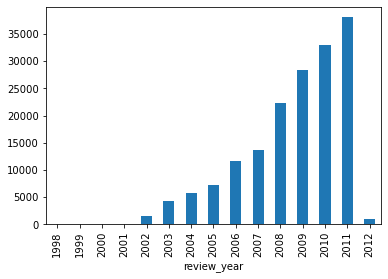

In [22]:
df_top50.groupby('review_year')['review_overall'].count().plot(kind='bar')

decided to drop all rows that have less than 5000 entries per year, as it might help the recommendation systems accuracy. 

In [23]:
# drop rows by review_year that have less than 5000 reviews 
df_top50 = df_top50[df_top50.groupby('review_year')['review_overall'].transform('count').ge(5000)]
df_top50.head()

address categories         city country  \
1  2010 Williams St    Brewery  San Leandro      US   
2  2010 Williams St    Brewery  San Leandro      US   
3  2010 Williams St    Brewery  San Leandro      US   
4  2010 Williams St    Brewery  San Leandro      US   
5  2010 Williams St    Brewery  San Leandro      US   

                               key        lat        long  \
1  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
2  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
3  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
4  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
5  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   

             brewery_name      phones postalCode  ... review_appearance  \
1  21st Amendment Brewery  5105952111      94577  ...               4.0   
2  21st Amendment Brewery  5105952111      94577  ...               4.0   
3  21st Amendment Brewery  5105952111      94577  ...               3.5   
4  21st Amendment Brewery  5105952111      94577  ...               4.5   
5  21st Amendment Brewery  5105952111      94577  ...               4.0   

  review_profilename                      beer_style  review_palate  \
1          illidurit  American Double / Imperial IPA            3.5   
2       magictrokini                    American IPA            3.0   
3     HapWifeHapLife                    American IPA            4.0   
4           pwoody11         Belgian Strong Dark Ale            4.0   
5           metter98         Belgian Strong Dark Ale            4.0   

  review_taste           beer_name  beer_abv  beer_beerid review_year  \
1          3.5             21 Rock       9.7        66190        2011   
2          4.0        Harvest Moon       6.4        45648        2008   
3          4.0  21st Amendment IPA       7.0        20781        2010   
4          4.0        Monk's Blood       8.3        52510        2010   
5          4.5        Monk's Blood       8.3        52510        2010   

  review_month  
1            3  
2           12  
3            1  
4            4  
5            3  

[5 rows x 27 columns]

In [24]:
# create new column based on beer styles by beer type stated if different key words are in the beer style
df_top50['beer_type'] = np.where(df_top50['beer_style'].str.contains('IPA'), 'IPA',
                                np.where(df_top50['beer_style'].str.contains('Stout'), 'Stout',
                                            np.where(df_top50['beer_style'].str.contains('Porter'), 'Porter',
                                                        np.where(df_top50['beer_style'].str.contains('Lager'), 'Lager',
                                                                    np.where(df_top50['beer_style'].str.contains('Ale'), 'Ale',
                                                                                np.where(df_top50['beer_style'].str.contains('Wheat'), 'Wheat',
                                                                                            np.where(df_top50['beer_style'].str.contains('Pilsner'), 'Pilsner',
                                                                                                        np.where(df_top50['beer_style'].str.contains('Sour'), 'Sour',
                                                                                                                    np.where(df_top50['beer_style'].str.contains('Pale'), 'Pale',
                                                                                                                                np.where(df_top50['beer_style'].str.contains('Barley'), 'Barley',
                                                                                                                                            np.where(df_top50['beer_style'].str.contains('Belgian'), 'Belgian',
                                                                                                                                                np.where(df_top50['beer_style'].str.contains('Bock'), 'Bock',
                                                                                                                                                    np.where(df_top50['beer_style'].str.contains('Malt'), 'Malt',
                                                                                                                                                        np.where(df_top50['beer_style'].str.contains('Witbier'), 'Witbier',
                                                                                                                                                            np.where(df_top50['beer_style'].str.contains('Doppelbock'), 'Doppelbock',
                                                                                                                                                                np.where(df_top50['beer_style'].str.contains('Rauchbier'), 'Rauchbier',
                                                                                                                                                                    np.where(df_top50['beer_style'].str.contains('Kölsch'), 'Kölsch',
                                                                                                                                                                        np.where(df_top50['beer_style'].str.contains('Dunkel'), 'Dunkel',
                                                                                                                                                                            np.where(df_top50['beer_style'].str.contains('Weizenbock'), 'Weizenbock',
                                                                                                                                                                                np.where(df_top50['beer_style'].str.contains('Schwarzbier'), 'Schwarzbier',
                                                                                                                                                                                    np.where(df_top50['beer_style'].str.contains('Gose'), 'Gose',
                                                                                                                                                                                        np.where(df_top50['beer_style'].str.contains('Fruit'), 'Fruit',
                                                                                                                                                                                            np.where(df_top50['beer_style'].str.contains('Bière'), 'Bière',
                                                                                                                                                                                                np.where(df_top50['beer_style'].str.contains('Winter'), 'Seasonal',
                                                                                                                                                                                                    np.where(df_top50['beer_style'].str.contains('Summer'), 'Seasonal',
                                                                                                                                                                                                        np.where(df_top50['beer_style'].str.contains('Spring'), 'Seasonal',
                                                                                                                                                                                                            np.where(df_top50['beer_style'].str.contains('Fall'), 'Seasonal',
                                                                                                                                                                                                                np.where(df_top50['beer_style'].str.contains('Steam'), 'Steam',
                                                                                                                                                                                                                    np.where(df_top50['beer_style'].str.contains('Hefeweizen'), 'Wheat',
                                                                                                                                                                                                                        np.where(df_top50['beer_style'].str.contains('Pale Ale'), 'Pale',
                                                                                                                                                                                                                            np.where(df_top50['beer_style'].str.contains('ESB'), 'Pale',
                                                                                                                                                                                                                                np.where(df_top50['beer_style'].str.contains('Tripel'), 'Belgian',
                                                                                                                                                                                                                                    np.where(df_top50['beer_style'].str.contains('Dubbel'), 'Ale',
                                                                                                                                                                                                                                        np.where(df_top50['beer_style'].str.contains('Spiced'), 'Seasonal',
                                                                                                                                                                                                                                            np.where(df_top50['beer_style'].str.contains('Oktoberfest'), 'Seasonal',
                                                                                                                                                                                                                                                np.where(df_top50['beer_style'].str.contains('Bitter'), 'Pale',
                                                                                                                                                                                                                                                    np.where(df_top50['beer_style'].str.contains('Pilsener'), 'Pilsner',
                                                                                                  
'Other')))))))))))))))))))))))))))))))))))))

df_top50.head()

address categories         city country  \
1  2010 Williams St    Brewery  San Leandro      US   
2  2010 Williams St    Brewery  San Leandro      US   
3  2010 Williams St    Brewery  San Leandro      US   
4  2010 Williams St    Brewery  San Leandro      US   
5  2010 Williams St    Brewery  San Leandro      US   

                               key        lat        long  \
1  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
2  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
3  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
4  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   
5  us/ca/sanleandro/2010williamsst  37.711807 -122.177658   

             brewery_name      phones postalCode  ... review_profilename  \
1  21st Amendment Brewery  5105952111      94577  ...          illidurit   
2  21st Amendment Brewery  5105952111      94577  ...       magictrokini   
3  21st Amendment Brewery  5105952111      94577  ...     HapWifeHapLife   
4  21st Amendment Brewery  5105952111      94577  ...           pwoody11   
5  21st Amendment Brewery  5105952111      94577  ...           metter98   

                       beer_style  review_palate  review_taste  \
1  American Double / Imperial IPA            3.5           3.5   
2                    American IPA            3.0           4.0   
3                    American IPA            4.0           4.0   
4         Belgian Strong Dark Ale            4.0           4.0   
5         Belgian Strong Dark Ale            4.0           4.5   

            beer_name  beer_abv  beer_beerid  review_year review_month  \
1             21 Rock       9.7        66190         2011            3   
2        Harvest Moon       6.4        45648         2008           12   
3  21st Amendment IPA       7.0        20781         2010            1   
4        Monk's Blood       8.3        52510         2010            4   
5        Monk's Blood       8.3        52510         2010            3   

  beer_type  
1       IPA  
2       IPA  
3       IPA  
4       Ale  
5       Ale  

[5 rows x 28 columns]

In [25]:
# value count of rows that contain 'Other' in beer_type column
df_top50['beer_type'].value_counts()


Ale            52220
IPA            39938
Stout          16080
Porter          9739
Barley          7949
Seasonal        6831
Lager           4912
Pilsner         2960
Fruit           2545
Bock            2528
Wheat           2362
Other           2279
Steam           1960
Pale            1951
Belgian         1560
Witbier         1535
Weizenbock      1111
Bière            571
Doppelbock       491
Kölsch           370
Schwarzbier      277
Dunkel           119
Rauchbier         77
Gose              43
Malt              43
Name: beer_type, dtype: int64

In [46]:
# change province from 'San Diego' to 'CA' in province column
df_top50['province'] = df_top50['province'].replace('San Diego', 'CA')


In [47]:
# save dataframe to csv
df_top50.to_csv('data/beer_df.csv', index=False)

In [48]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242757 entries, 0 to 260514
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   address             242757 non-null  object  
 1   categories          242757 non-null  object  
 2   city                242757 non-null  object  
 3   country             242757 non-null  object  
 4   key                 242757 non-null  object  
 5   lat                 242757 non-null  float64 
 6   long                242757 non-null  float64 
 7   brewery_name        242757 non-null  object  
 8   phones              223386 non-null  object  
 9   postalCode          242061 non-null  object  
 10  province            242757 non-null  object  
 11  websites            194059 non-null  object  
 12  index               242757 non-null  int64   
 13  brewery_id          242757 non-null  int64   
 14  review_time         242757 non-null  int64   
 15  review_overall   

In [49]:
# keep all rows that contain values in lat and long columns
df_merged = df_merged[df_merged['lat'].notna()]
df_merged = df_merged[df_merged['long'].notna()]
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 242757 entries, 0 to 260514
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   address             242757 non-null  object  
 1   categories          242757 non-null  object  
 2   city                242757 non-null  object  
 3   country             242757 non-null  object  
 4   key                 242757 non-null  object  
 5   lat                 242757 non-null  float64 
 6   long                242757 non-null  float64 
 7   brewery_name        242757 non-null  object  
 8   phones              223386 non-null  object  
 9   postalCode          242061 non-null  object  
 10  province            242757 non-null  object  
 11  websites            194059 non-null  object  
 12  index               242757 non-null  int64   
 13  brewery_id          242757 non-null  int64   
 14  review_time         242757 non-null  int64   
 15  review_overall   

<AxesSubplot:>

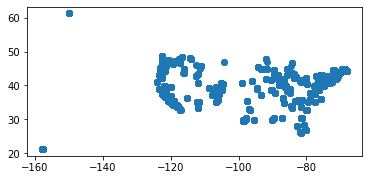

In [29]:
# plot location of breweries using lat and long columns using geopandas
import geopandas as gpd
from shapely.geometry import Point

# create geometry column
geometry = [Point(xy) for xy in zip(df_merged['long'], df_merged['lat'])]

# create geodataframe
gdf = gpd.GeoDataFrame(df_merged, geometry=geometry)

# plot breweries
gdf.plot()


<AxesSubplot:>

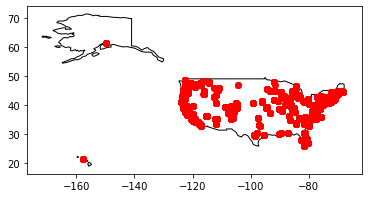

In [30]:
# use geopandas to plot locations of breweries on map of united states
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us = world[world.name == 'United States of America']

# plot breweries on map of united states
ax = us.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')



<AxesSubplot:>

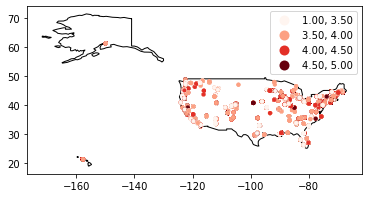

In [31]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us = world[world.name == 'United States of America']

# plot breweries on map of united states
ax = us.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, column='review_overall', cmap='Reds', scheme='quantiles', legend=True, markersize=10, k=4)



In [95]:
# use geojson to plot locations of breweries on map of united states in folium
import folium
from folium.plugins import HeatMap

# create map of united states
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# create list of brewery locations
locations = gdf[['lat', 'long']].values.tolist()

# create list of brewery review counts
review_counts = gdf['review_overall'].values.tolist()

# create heatmap of brewery locations
HeatMap(data=locations, radius=15).add_to(m)

# show map
m


In [33]:
# create save of df_merged
df_merged.to_csv('data/all_beer_df.csv', index=False)

In [ ]:
# palatte of beers colors 
# palette=["#FCCE00","#F17100","#DC3711","#8F3237","#3C1D23"]
# #f28e1c - light beer color (recognizable)

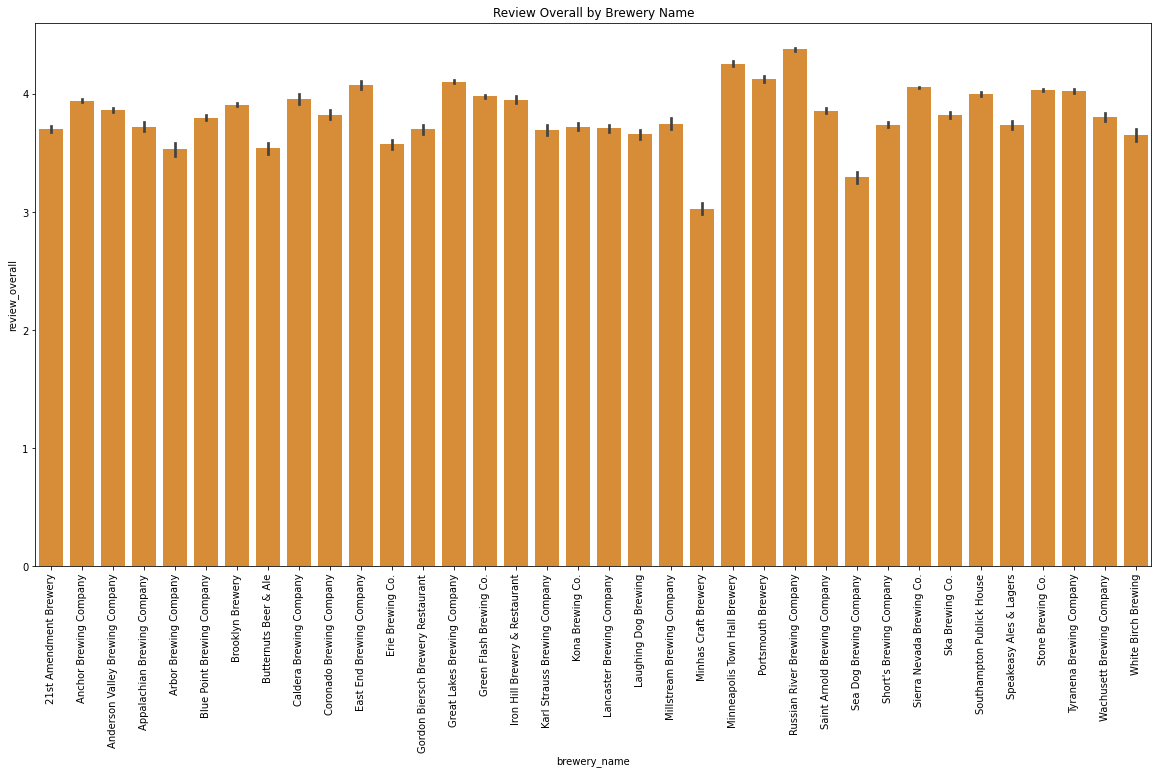

In [77]:
# create plots of review_overall by brewery_name
plt.figure(figsize=(20,10))
sns.barplot(x='brewery_name', y='review_overall', data=df_top50, palette=["#f28e1c"])
plt.title('Review Overall by Brewery Name')
plt.xticks(rotation=90)
plt.show()

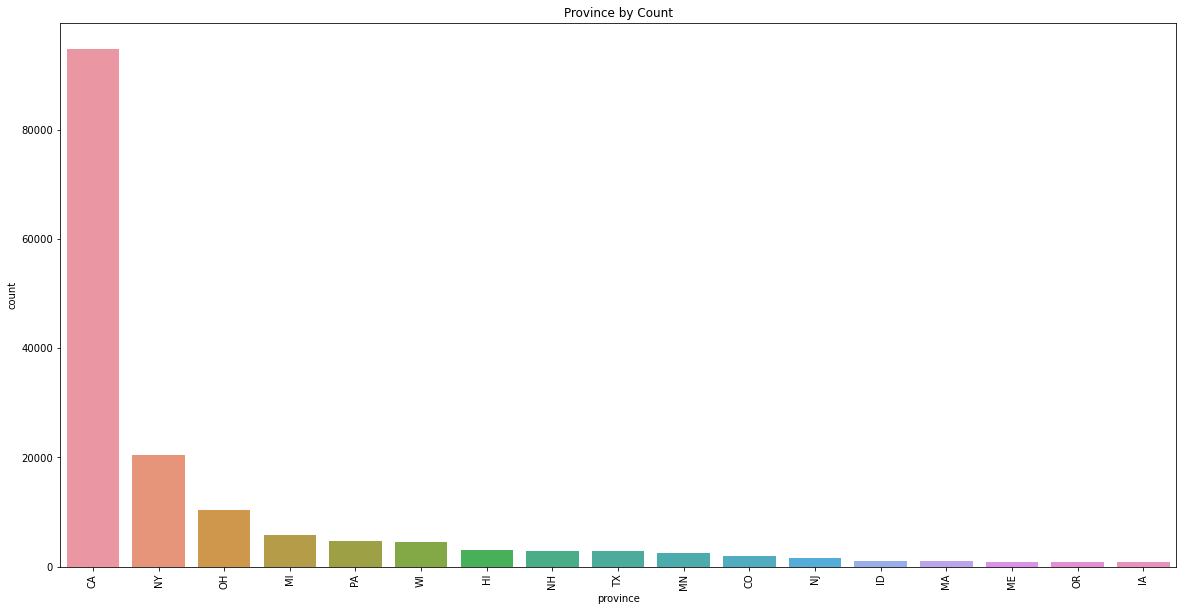

In [50]:
# create plots of province by count sorted in descending order

plt.figure(figsize=(20,10))
sns.countplot(x='province', data=df_top50, order=df_top50['province'].value_counts().index)
plt.title('Province by Count')
plt.xticks(rotation=90)
plt.show()

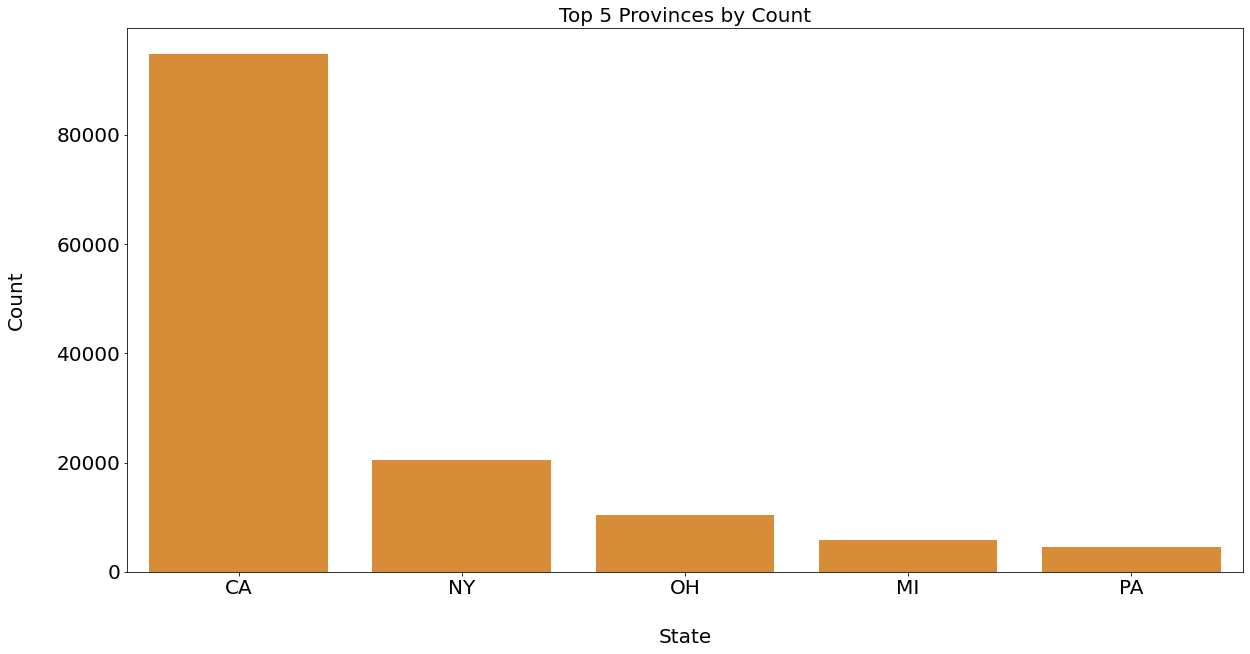

In [93]:
# plot count of top 5 provinces 
plt.figure(figsize=(20,10))
sns.countplot(x='province', data=df_top50, order=df_top50['province'].value_counts().iloc[:5].index, palette=["#f28e1c"])
plt.title('Top 5 Provinces by Count', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('State', fontsize=20, labelpad=30)
plt.ylabel('Count', fontsize=20, labelpad=30)
plt.show()

In [52]:
# find percentage of data that is taken up by CA
df_top50['province'].value_counts(normalize=True)

CA    0.590897
NY    0.127989
OH    0.065173
MI    0.035774
PA    0.028788
WI    0.028675
HI    0.019233
NH    0.018436
TX    0.017420
MN    0.015662
CO    0.012191
NJ    0.009822
ID    0.007011
MA    0.006818
ME    0.005684
OR    0.005428
IA    0.004998
Name: province, dtype: float64

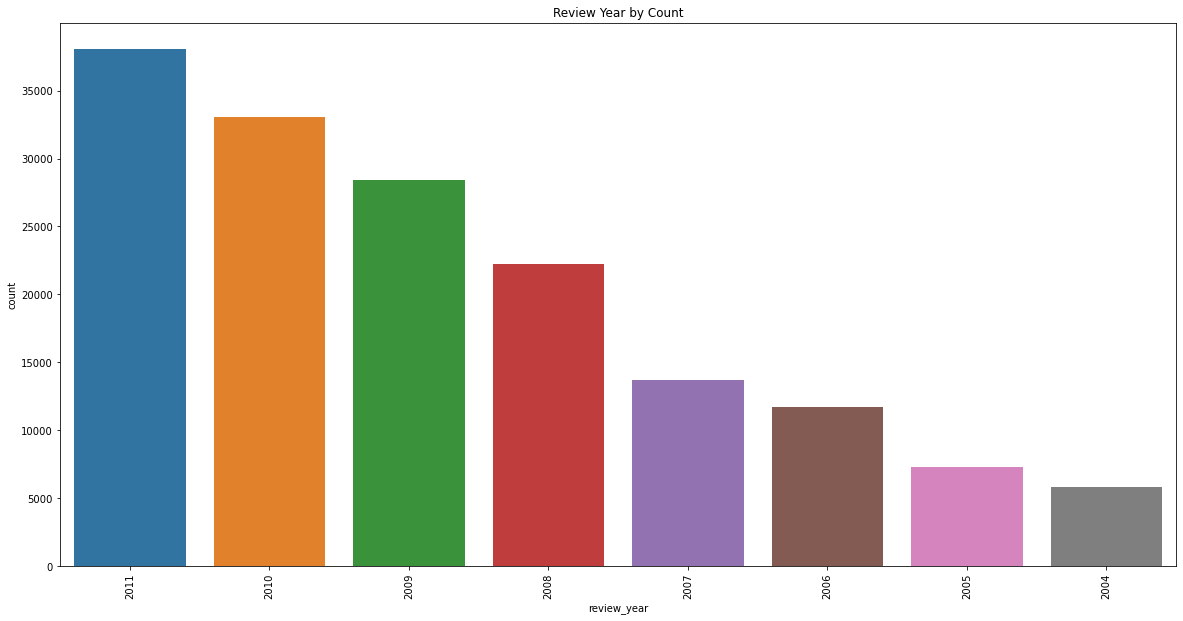

In [38]:
# create plots of review_year by count sorted in descending order
plt.figure(figsize=(20,10))
sns.countplot(x='review_year', data=df_top50, order=df_top50['review_year'].value_counts().index)
plt.title('Review Year by Count')
plt.xticks(rotation=90)
plt.show()

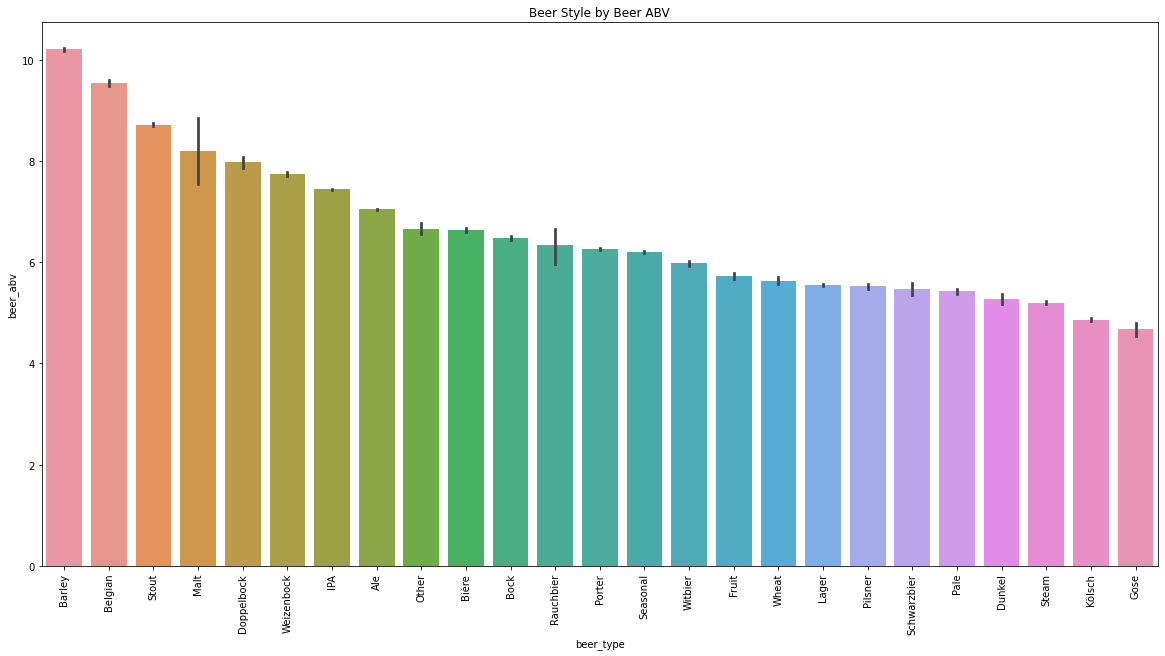

In [79]:
# plot beer_style by beer_abv sorted in descending order
plt.figure(figsize=(20,10))
sns.barplot(x='beer_type', y='beer_abv', data=df_top50, order=df_top50.groupby('beer_type')['beer_abv'].mean().sort_values(ascending=False).index)
plt.title('Beer Style by Beer ABV')
plt.xticks(rotation=90)
plt.show()


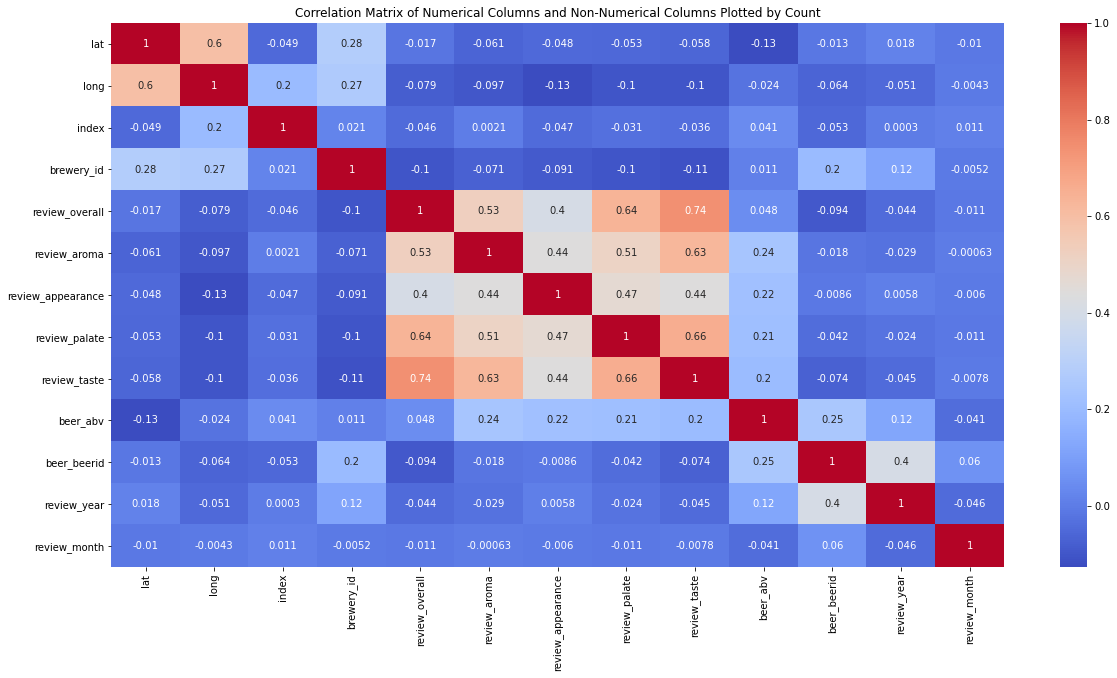

In [80]:
# plot correlation matrix of numerical columns
plt.figure(figsize=(20,10))
sns.heatmap(df_top50.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns and Non-Numerical Columns Plotted by Count')
plt.show()

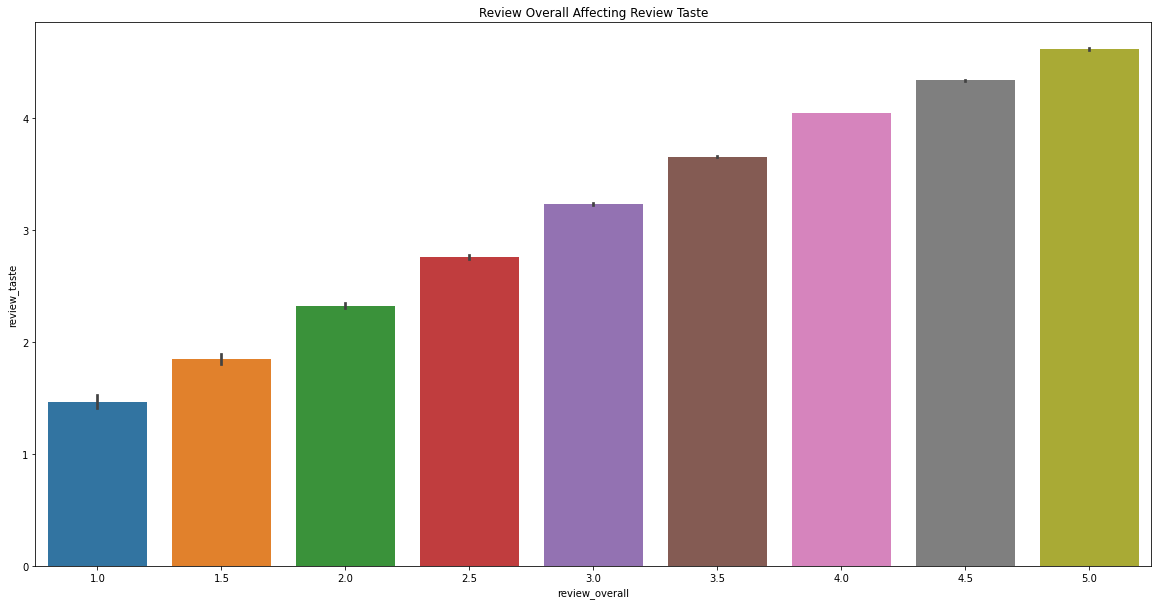

In [81]:
# review overall affecting review_taste
plt.figure(figsize=(20,10))
sns.barplot(x='review_overall', y='review_taste', data=df_top50)
plt.title('Review Overall Affecting Review Taste')
plt.show()


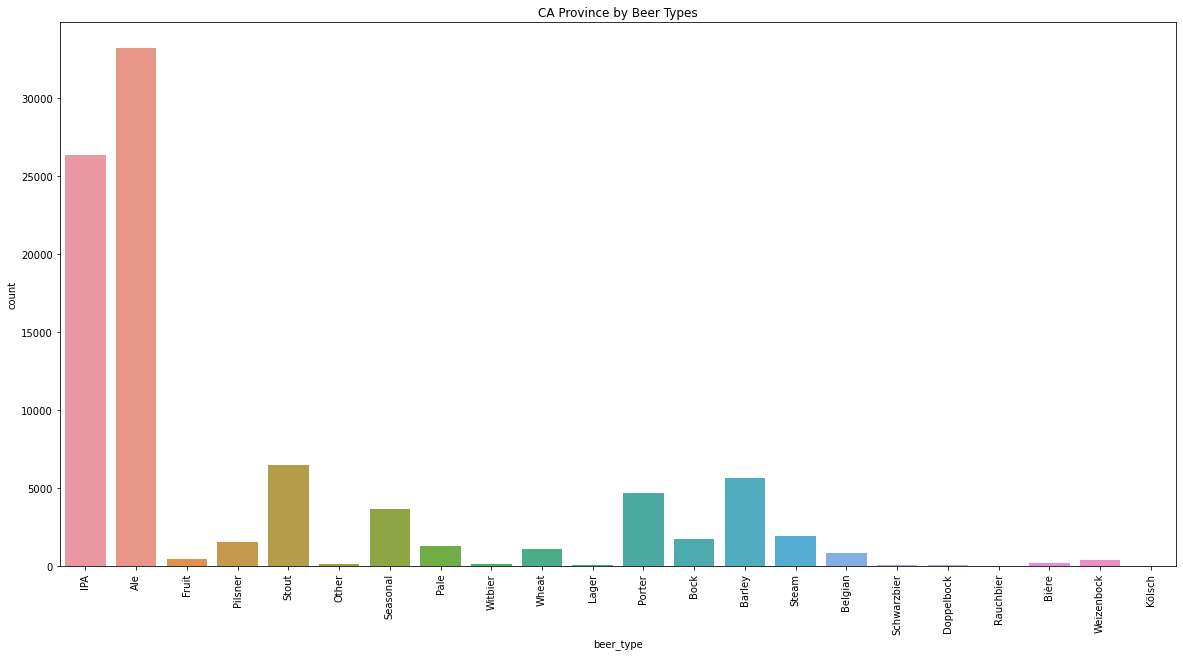

In [42]:
# plot of 'CA' province by beer_types
plt.figure(figsize=(20,10))
sns.countplot(x='beer_type', data=df_top50[df_top50['province'] == 'CA'])
plt.title('CA Province by Beer Types')
plt.xticks(rotation=90)
plt.show()

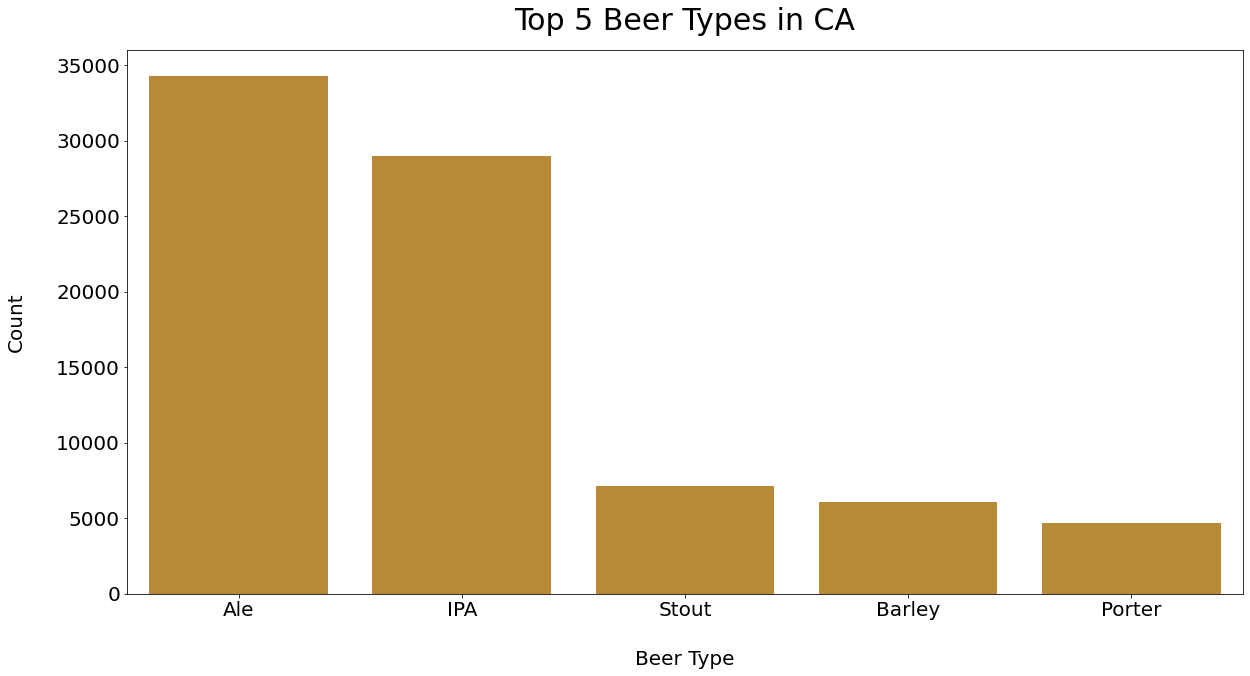

In [65]:
# plot top 5 beer types in CA color as "#CD8F22", larger font size of axes labels, with space between bar and label
plt.figure(figsize=(20,10))
sns.countplot(x='beer_type', data=df_top50[df_top50['province'] == 'CA'], order=df_top50[df_top50['province'] == 'CA']['beer_type'].value_counts().iloc[:5].index, palette=["#CD8F22"])
plt.title('Top 5 Beer Types in CA', fontsize=30, pad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Beer Type', fontsize=20, labelpad=30)
plt.ylabel('Count', fontsize=20, labelpad=30)
plt.show()

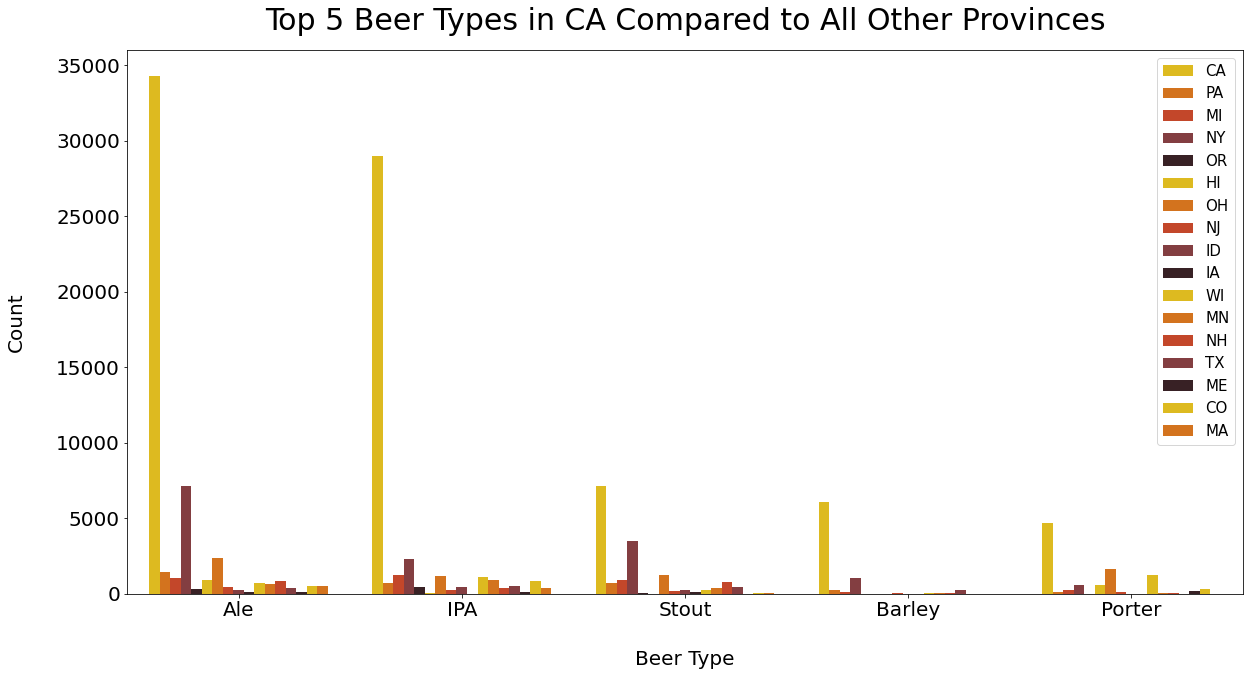

In [76]:
# beer_types in CA count compared to all other provinces3C1D23
plt.figure(figsize=(20,10))
sns.countplot(x='beer_type', data=df_top50, hue='province', order=df_top50[df_top50['province'] == 'CA']['beer_type'].value_counts().iloc[:5].index, palette=["#FCCE00", "#F17100","#DC3711","#8F3237","#3C1D23"])
plt.title('Top 5 Beer Types in CA Compared to All Other Provinces', fontsize=30, pad=20)
plt.legend(loc='upper right', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Beer Type', fontsize=20, labelpad=30)
plt.ylabel('Count', fontsize=20, labelpad=30)
plt.show()

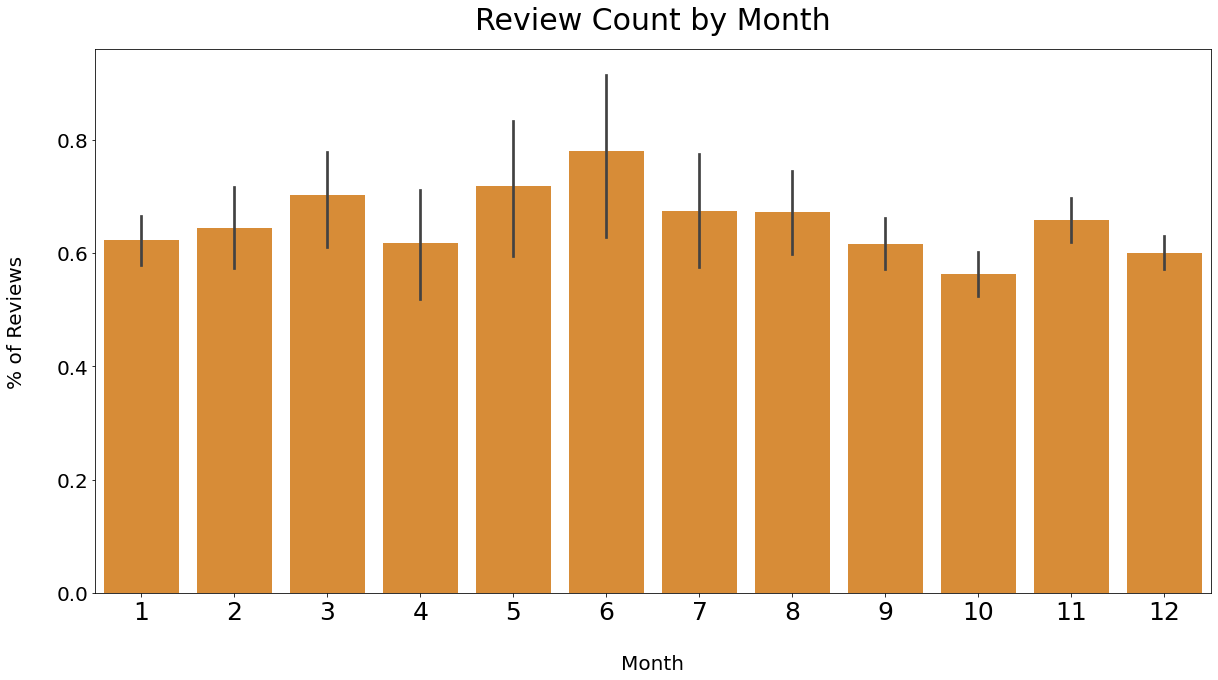

In [91]:
# plot std review_overall by review_month only using rows that contain seasonal in beer_type column
plt.figure(figsize=(20,10))
sns.barplot(x='review_month', y='review_overall', estimator=np.std, data=df_top50[df_top50['beer_type'] == 'Seasonal'], palette=["#f28e1c"])
plt.title('Review Count by Month', fontsize=30, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.xlabel('Month', fontsize=20, labelpad=30)
plt.ylabel('% of Reviews', fontsize=20, labelpad=30)
plt.show()


In [44]:
#show values of review_profilenames that are top 10 most commmon
df_top50['review_profilename'].value_counts().head(10)

akorsak           434
mikesgroove       416
Thorpe429         361
womencantsail     360
northyorksammy    336
Kegatron          332
BuckeyeNation     306
brentk56          305
drabmuh           272
tempest           270
Name: review_profilename, dtype: int64

In [45]:
#show values of review_profilenames that are the top percent of the data
df_top50['review_profilename'].value_counts(normalize=True).head(10)

akorsak           0.002705
mikesgroove       0.002593
Thorpe429         0.002250
womencantsail     0.002244
northyorksammy    0.002094
Kegatron          0.002069
BuckeyeNation     0.001907
brentk56          0.001901
drabmuh           0.001695
tempest           0.001683
Name: review_profilename, dtype: float64

We had about 250 users that have rated more than 100 beers, so there are no super users within the dataset, which is good.